In [3]:
#initplot(:jupyter)
using Plots
theme(:vibrant)
gr(frame=:box, linewidth=2.0)

Plots.GRBackend()

In [4]:
using Revise
using StaticArrays
using DipoleRadiators

In [5]:
includet("rison.jl")

## NBE1

In [107]:
t = range(2e-5, stop=7e-5, length=1000);
robs = @SVector [5.5 * co.kilo, 0 * co.kilo, 0 * co.kilo];

In [108]:
# Load observational data
obsdata = readdlm("NBE1.dat");

First we check against the Uman equation using the standard MTLE

  0.015162 seconds (2.02 k allocations: 218.422 KiB, 98.72% gc time)
  0.062168 seconds (184 allocations: 270.906 KiB)


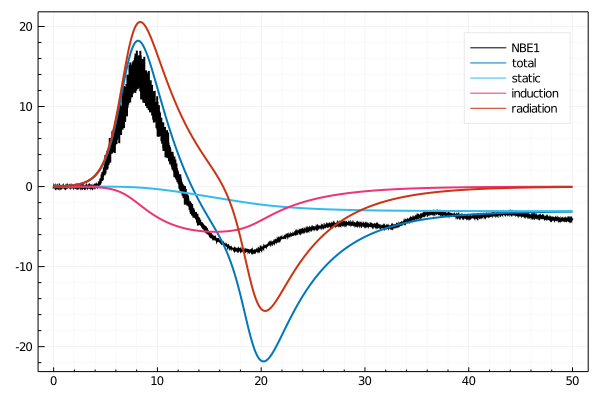

In [110]:
@time tl = channel(Ipk=51.5e3, λ=900, τ1=1e-6, τ2=5e-6)
@time res = getfields(tl, robs, t);

plot(obsdata[:, 1], obsdata[:, 2], label="NBE1", color=:black);
plot!(res.t * 1e6 .- 20, res.tot, label="total", lw=2.0);
plot!(res.t * 1e6 .- 20, res.stat, label="static");
plot!(res.t * 1e6 .- 20, res.ind, label="induction");
plot!(res.t * 1e6 .- 20, res.rad, label="radiation")

Now if we use a smaller lambda the fit is a bit better but we cannot fit the electrostatic (long time) part and the "reflection" is still there

  0.000125 seconds (2.02 k allocations: 218.422 KiB)
  0.064903 seconds (37 allocations: 261.500 KiB)


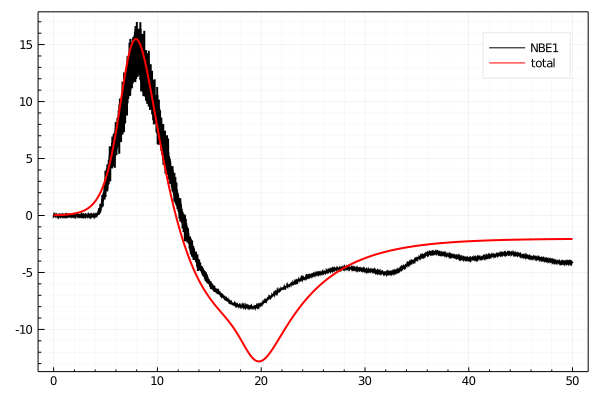

In [112]:
@time tl = channel(Ipk=51.5e3, λ=300, τ1=1e-6, τ2=5e-6)
@time res = getfields(tl, robs, t);

plot(obsdata[:, 1], obsdata[:, 2], label="NBE1", color=:black);
plot!(res.t * 1e6 .- 20, res.tot, label="total", lw=2.0, color=:red)

Just by adding the "bouncing" part the "reflection" almost dissapears and the electrostatic component fits better.

  0.000286 seconds (4.04 k allocations: 456.375 KiB)
  0.130201 seconds (212 allocations: 429.984 KiB)


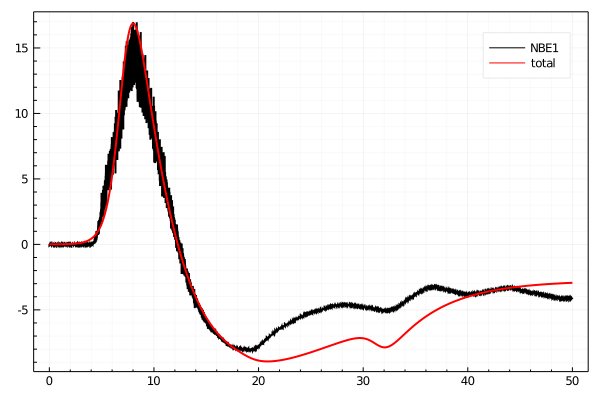

In [114]:
@time tl = channel(Ipk=50e3, λ=400, τ1=0.75e-6, τ2=5e-6, v1=4.e7, λ1=400, bounce=true)
@time res = getfields(tl, robs, t);

plot(obsdata[:, 1], obsdata[:, 2], label="NBE1", color=:black);
plot!(res.t * 1e6 .- 20, res.tot, label="total", lw=2.0, color=:red)

## NBE3

## Vertical channel

In [7]:
t = range(0e-5, stop=7e-5, length=1000);
robs = @SVector [3.3 * co.kilo, 0 * co.kilo, 0 * co.kilo];

In [8]:
# Load observational data
obsdata = readdlm("NBE3.dat");

  0.288405 seconds (543.47 k allocations: 28.281 MiB, 5.50% gc time)
  1.653099 seconds (3.12 M allocations: 156.417 MiB, 3.70% gc time)


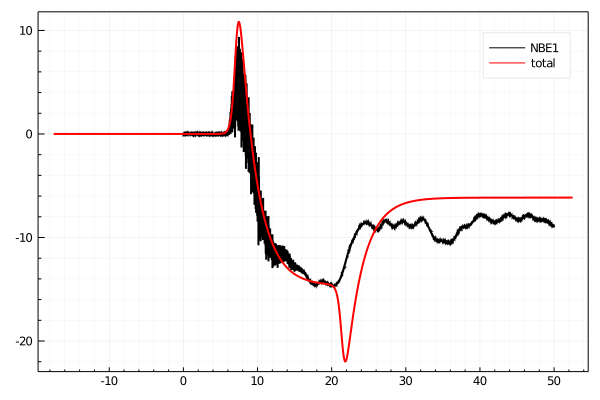

In [8]:
# These are the paper's parameters
@time tl = channel(H2=6.6e3, Z0=560, Ipk=65.6e3, λ=900, τ1=0.3e-6, τ2=2.3e-6)
@time res = getfields(tl, robs, t);

plot(obsdata[:, 1], obsdata[:, 2], label="NBE1", color=:black);
plot!(res.t * 1e6 .- 17.5, res.tot, label="total", lw=2.0, color=:red)

  0.000285 seconds (4.05 k allocations: 460.266 KiB)
  0.117245 seconds (212 allocations: 429.984 KiB)


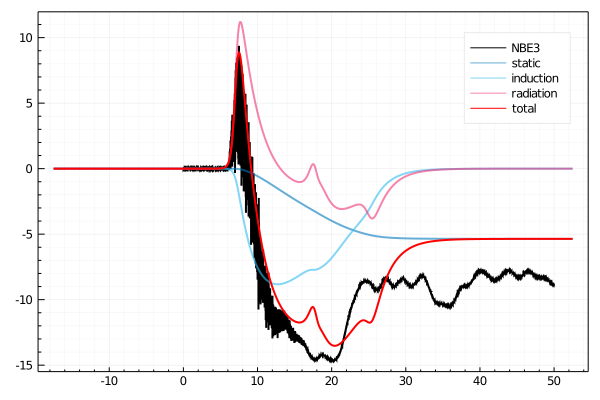

In [58]:
@time tl = channel(H2=6.6e3, Z0=560, Ipk=42e3, λ=600, τ1=0.3e-6, τ2=3e-6, bounce=true, γ=0.8, 
    λ1=600.0, v=4.5e7, v1=10e7, τ1u=0.5e-6, τ2u=2e-6)
@time res = getfields(tl, robs, t);


shift = 17.5
plot(obsdata[:, 1], obsdata[:, 2], label="NBE3", color=:black);
plot!(res.t * 1e6 .- shift, res.stat, label="static", alpha=0.6);
plot!(res.t * 1e6 .- shift, res.ind, label="induction", alpha=0.6);
plot!(res.t * 1e6 .- shift, res.rad, label="radiation", alpha=0.6);
plot!(res.t * 1e6 .- shift, res.tot, label="total", lw=2.0, color=:red)

  0.000157 seconds (2.02 k allocations: 234.031 KiB)


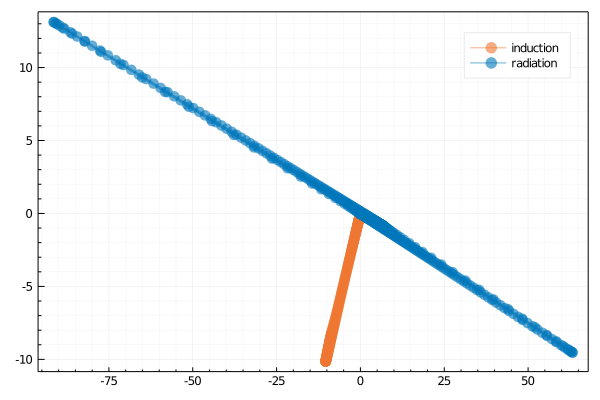

  0.060900 seconds (183 allocations: 270.781 KiB)
r = 7379.024325749306
beta = 0.9794229272855619
gamma = 0.1434375532411915


In [12]:
@time tl = channel(H2=6.6e3, Z0=560, Ipk=63.4e3, λ=900, τ1=0.3e-6, τ2=2.3e-6, bounce=false, 
    λ1=200.0, v=3.5e7, v1=7e7)
@time res = getfields(tl, robs, t);
dt = t[2] - t[1]
r = sqrt(6.6e3^2 + 3.3e3^2)
@show r
plot(r * diff(res.stat) / dt / co.c, res.ind[1:end-1], marker=:circle,label="induction", alpha=0.6)
display(plot!(r^2 * diff(diff(res.stat)) / dt^2 / co.c^2, res.rad[2:end-1], marker=:circle,label="radiation", alpha=0.6))

# Computing prop constants
println("beta = ", maximum(abs.(res.ind[1:end-1]) / maximum(abs.(r * diff(res.stat) / dt / co.c))))
println("gamma = ", maximum(abs.(res.rad[2:end-1]) / maximum(abs.(r^2 * diff(diff(res.stat)) / dt^2 / co.c^2))))

#plot!(res.stat, res.rad, label="radiation", alpha=0.6)

## Slanted channel

  0.000090 seconds (222 allocations: 59.438 KiB)
  0.158700 seconds (53.28 k allocations: 3.341 MiB)


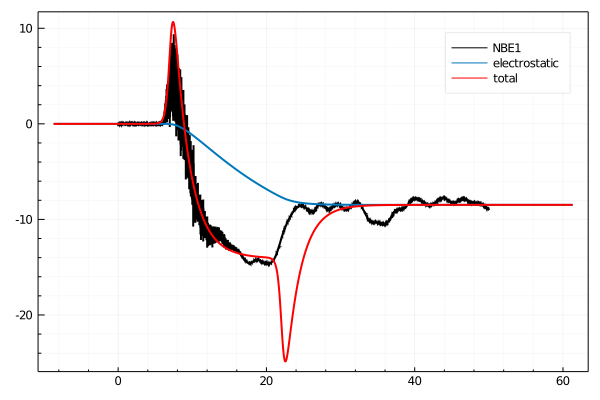

In [67]:
# These are the default parameters - do not change
@time tl = channel(θ=deg2rad(60), ϕ=deg2rad(260), H2=6.6e3, Z0=560, Ipk=69.4e3, λ=900, τ1=0.3e-6, τ2=2e-6)
@time res = getfields(tl, robs, t, coord=3);

plot(obsdata[:, 1], obsdata[:, 2], label="NBE1", color=:black);
plot!(res.t * 1e6 .- 8.7, res.stat, label="electrostatic", lw=2.0)
plot!(res.t * 1e6 .- 8.7, res.tot, label="total", lw=2.0, color=:red)

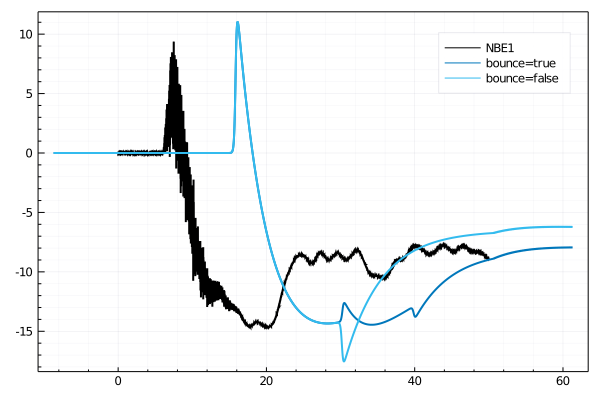

In [83]:
plot(obsdata[:, 1], obsdata[:, 2], label="NBE1", color=:black);
for bounce in (true, false)
    tl = channel(θ=deg2rad(0), ϕ=deg2rad(100), H2=6.6e3, Z0=560, Ipk=0.85*69.4e3, λ=400, τ1=0.1e-6, τ2=5e-6, 
        bounce=bounce,
    λ1=400, v1=7e7)
    res = getfields(tl, robs, t, coord=3);
    plot!(res.t * 1e6 .- 8.7, res.tot, label="bounce=$bounce", lw=2.0)
end
plot!()

In [17]:
aϕ = 0:5:360
astat = map(aϕ) do ϕ
    tl = channel(θ=deg2rad(60), ϕ=deg2rad(ϕ), H2=6.6e3, Z0=560, Ipk=69.4e3, λ=900, τ1=0.3e-6, τ2=2.3e-6, 
        bounce=false)
    res = getfields(tl, robs, [100e-6], coord=3)
    res.stat[1]
end;
plot(aϕ, astat, label="")

UndefVarError: UndefVarError: CurrentPulse not defined